# Chatbots basics
tutorial source: https://medium.com/analytics-vidhya/building-a-simple-chatbot-in-python-using-nltk-7c8c8215ac6e

# Rule-based approach and self-learning approach

- In a Rule-based approach, a bot answers questions based on some rules, which it is trained on. The rules defined can be very simple to very complex. The bots can handle simple queries but fail to manage complex ones.


- Self-learning bots are the ones that use some Machine Learning-based approaches and are more efficient than rule-based bots. These bots can be of further two types: Retrieval Based or Generative.


# A simple retriaval based chatbot based on NLTK

    Steps:
    1. text pre-processing
    2. transform text into a meaningful vector of numbers

## TfidfVectorizer
- Term Frequency Inverse Document Frequency
- transforms text into meaningful representation of numbers 

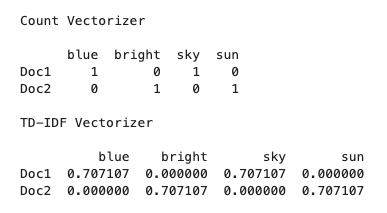

In [2]:
from IPython.display import Image 
Image(filename='vectorizer.png')

## imports libraries

In [1]:
!pip3 install wikipedia

/home/alicja/anaconda3/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/home/alicja/anaconda3/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


In [2]:
import nltk
import numpy as np
import random
import string
import wikipedia
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

nltk.download('punkt') 
nltk.download('wordnet') 

[nltk_data] Downloading package punkt to /home/alicja/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/alicja/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## prepares data

In [3]:
# https://en.wikipedia.org/wiki/Chatbot
result = wikipedia.search("Chatbots")
print(result)

page = wikipedia.page(result[3])
content = page.content

with open("chatbot.txt","a") as f:
    f.write(content)

['Chatbot', 'List of chatbots', 'Kuki (chatbot)', 'Internet bot', 'Chatbot (disambiguation)', 'Zo (bot)', 'Bank of America', 'Conversational user interface', 'Yalochat', 'Gupshup']


## reads data

In [4]:
with open("chatbot.txt") as f:
    raw_data = f.read()
    
# print fragment of data
print(raw_data[:100])

A chatbot is a software application used to conduct an on-line chat conversation via text or text-to


## basic text pre-processing 

In [5]:
# converts words to a lowercase
raw_data = raw_data.lower()

# converts to a list of sentences 
sent_tokens = nltk.sent_tokenize(raw_data)
print("sentence tokens: ", sent_tokens[:2], end='\n\n')

# converts to a list of words
word_tokens = nltk.word_tokenize(raw_data)
print("word tokens: ", word_tokens[:10])

sentence tokens:  ['a chatbot is a software application used to conduct an on-line chat conversation via text or text-to-speech, in lieu of providing direct contact with a live human agent.', 'designed to convincingly simulate the way a human would behave as a conversational partner, chatbot systems typically require continuous tuning and testing, and many in production remain unable to adequately converse or pass the industry standard turing test.']

word tokens:  ['a', 'chatbot', 'is', 'a', 'software', 'application', 'used', 'to', 'conduct', 'an']


## normalizes tokens

In [6]:
lemmer = nltk.stem.WordNetLemmatizer()

def lem_normalize(text):
    remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
    tokens = nltk.word_tokenize(text.lower().translate(remove_punct_dict))
    final_text = [lemmer.lemmatize(token) for token in tokens]
    return final_text

## defines keyword matching

In [7]:
GREETING_INPUTS = ("hello", "hi", "greetings", "sup", "what's up","hey",)
GREETING_RESPONSES = ["hi", "hey", "*nods*", "hi there", "hello", "I am glad! You are talking to me"]

def greeting(sentence): 
    for word in sentence.split():
        if word.lower() in GREETING_INPUTS:
            return random.choice(GREETING_RESPONSES)

## generates response
- Uses the concept of document similarity

In [8]:
def response(user_response):
    robo_response=''
    sent_tokens.append(user_response)
    TfidfVec = TfidfVectorizer(tokenizer=lem_normalize, stop_words='english')
    tfidf = TfidfVec.fit_transform(sent_tokens)
    vals = cosine_similarity(tfidf[-1], tfidf)

    idx=vals.argsort()[0][-2]
    flat = vals.flatten()
    flat.sort()
    req_tfidf = flat[-2]
    if(req_tfidf==0):
        robo_response=robo_response+"I am sorry! I don't understand you"
        return robo_response
    else:
        robo_response = robo_response+sent_tokens[idx]
        return robo_response

In [ ]:
flag=True
print("ROBO: My name is Robo. I will answer your queries about Chatbots. If you want to exit, type Bye!")
while(flag==True):
    user_response = input()
    user_response=user_response.lower()
    if(user_response!='bye'):
        if(user_response=='thanks' or user_response=='thank you'):
            flag=False
            print("ROBO: You are welcome..")
        else:
            if(greeting(user_response)!=None):
                print("ROBO: "+greeting(user_response))
            else:
                print("ROBO: ",end="")
                print(response(user_response))
                sent_tokens.remove(user_response)
    else:
        flag=False
        print("ROBO: Bye! take care..")

ROBO: My name is Robo. I will answer your queries about Chatbots. If you want to exit, type Bye!
